# CONTENTS

## 1. Importing libraries and "Core_Metrics_Clean.csv" data set

## 2. Renaming columns and creating subset with applicable variables only

## 3. Creating a correlation matrix heatmap

## 4. Creating scatterplots for the variables with the strongest correlations

## 5. Creating a pair plot of the data set

## 6. Creating a categorical plot of Median Days on Market vs. Median Sq Ft

## 7. Revisiting the original questions. Adding new questions based on the early findings in the visual exploration

## 8. Defining hypotheses

## 9. Exporting 'core_met' with renamed columns

In [1]:
# _____________________________________________________

## 1. Importing libraries and "Core_Metrics_Clean.csv" data set

In [59]:
# Importing libraries:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Importing "Core_Metrics_Clean.csv" data set as "core_met":

path = r'/Users/elena/Documents/Data Analytics Course/6. Advanced Analytics and Dashboard Design'

core_met = pd.read_csv(os.path.join(path, 'Core_Metrics_Clean.csv'))

core_met.shape

(4029, 16)

In [4]:
core_met.head()

,Unnamed: 0,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio
0,0,202301,Colorado,CO,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613
1,1,202301,Wisconsin,WI,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875
2,2,202301,Nebraska,NE,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387
3,3,202301,Kansas,KS,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575
4,4,202301,West Virginia,WV,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576


## 2. Renaming columns and creating subset with applicable variables only

In [5]:
# Renaming columns:

core_met.rename(columns = {'month_date_yyyymm' : 'Date', 'state': 'State', 
                     'state_id': 'State ID', 'median_listing_price': 'Median Listing Price',
                     'active_listing_count': 'No. Active Listings', 'median_days_on_market' : 'Median Days on Market',
                    'new_listing_count' : 'No. New Listings', 'price_increased_count' : 'No. Increased Price',
                    'price_reduced_count' : 'No. Reduced Price', 'pending_listing_count' : 'No. Pending Listings',
                    'median_listing_price_per_square_foot' : 'Median Sq Ft Price', 'median_square_feet' : 'Median Sq Feet',
                    'average_listing_price' : 'Avg Listing Price', 'total_listing_count' : 'No. Total Listings', 'pending_ratio' : 'Pending Ratio'},
                      inplace = True)

core_met.head()

,Unnamed: 0,Date,State,State ID,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio
0,0,202301,Colorado,CO,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613
1,1,202301,Wisconsin,WI,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875
2,2,202301,Nebraska,NE,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387
3,3,202301,Kansas,KS,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575
4,4,202301,West Virginia,WV,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576


In [23]:
core_met.dtypes

Unnamed: 0                 int64
Date                       int64
State                     object
State ID                  object
Median Listing Price       int64
No. Active Listings        int64
Median Days on Market      int64
No. New Listings           int64
No. Increased Price        int64
No. Reduced Price          int64
No. Pending Listings     float64
Median Sq Ft Price         int64
Median Sq Feet             int64
Avg Listing Price          int64
No. Total Listings         int64
Pending Ratio            float64
dtype: object

In [6]:
# Converting strings of 'Median Days on Market' into floats:

core_met['Median Days on Market'] = core_met['Median Days on Market'].astype('int')

In [8]:
# Creating a subset excluding the 'Unnamed: 0', 'Date', 'State ID', 'pending_ratio' columns:

subset = core_met[['State', 'Median Listing Price', 'No. Active Listings', 'Median Days on Market',
                   'No. New Listings', 'No. Increased Price', 'No. Reduced Price','No. Pending Listings',
                   'Median Sq Ft Price','Median Sq Feet','Avg Listing Price','No. Total Listings']]
subset.head()

,State,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings
0,Colorado,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025
1,Wisconsin,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504
2,Nebraska,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099
3,Kansas,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479
4,West Virginia,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355


## 3. Creating a correlation matrix heatmap

In [9]:
# Creating a correlation matrix using pandas:

subset.corr()

,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings
Median Listing Price,1.000000,-0.031038,-0.361722,0.125409,0.095474,0.004186,0.134361,0.913097,-0.157975,0.937465,0.026872
No. Active Listings,-0.031038,1.000000,0.054177,0.873639,0.746851,0.945250,0.765410,-0.074895,0.042775,0.056364,0.973069
Median Days on Market,-0.361722,0.054177,1.000000,-0.203643,-0.130012,-0.054736,-0.212318,-0.291908,0.023499,-0.259575,-0.038724
No. New Listings,0.125409,0.873639,-0.203643,1.000000,0.825913,0.860601,0.918516,0.044974,0.040442,0.187642,0.939576
No. Increased Price,0.095474,0.746851,-0.130012,0.825913,1.000000,0.779426,0.788218,0.019858,0.143302,0.124524,0.804377
No. Reduced Price,0.004186,0.945250,-0.054736,0.860601,0.779426,1.000000,0.751895,-0.047319,0.075970,0.052388,0.930126
No. Pending Listings,0.134361,0.765410,-0.212318,0.918516,0.788218,0.751895,1.000000,0.065075,0.015314,0.198108,0.893281
Median Sq Ft Price,0.913097,-0.074895,-0.291908,0.044974,0.019858,-0.047319,0.065075,1.000000,-0.479816,0.856393,-0.028784
Median Sq Feet,-0.157975,0.042775,0.023499,0.040442,0.143302,0.075970,0.015314,-0.479816,1.000000,-0.163099,0.036407
Avg Listing Price,0.937465,0.056364,-0.259575,0.187642,0.124524,0.052388,0.198108,0.856393,-0.163099,1.000000,0.111187


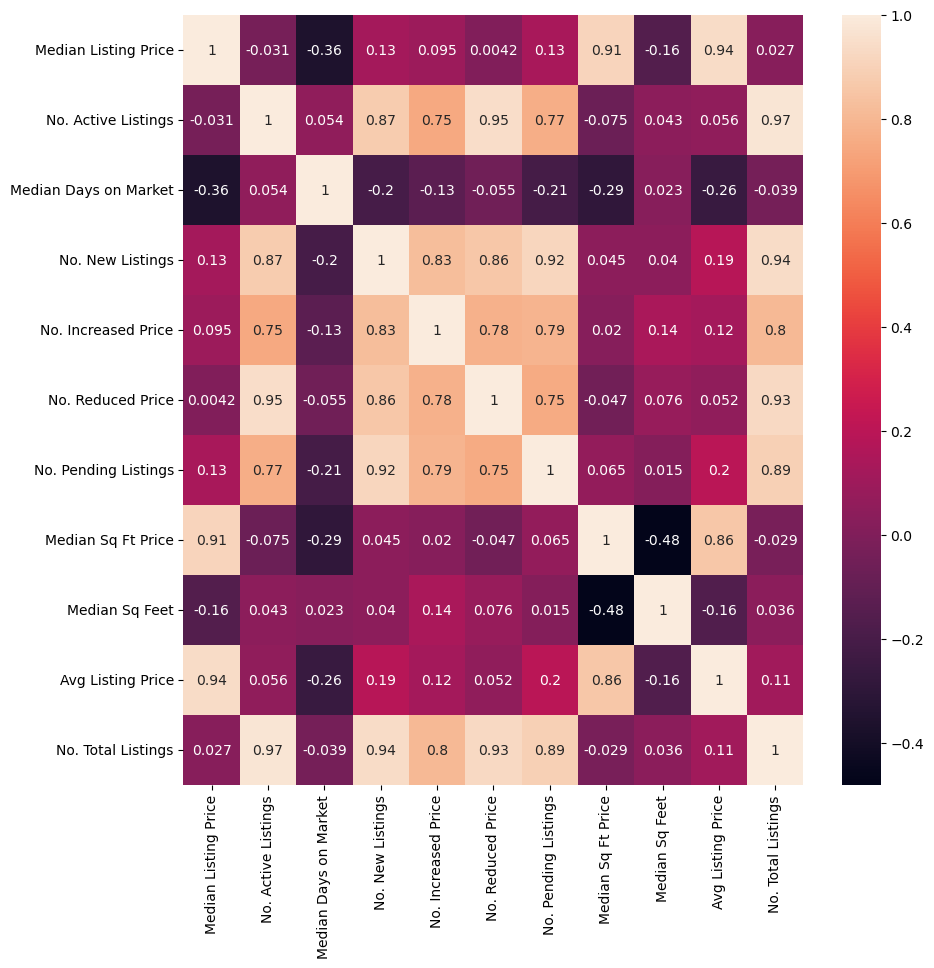

In [10]:
# Creating a subplot with matplotlib:

f,ax = plt.subplots(figsize=(10,10))

# Creating a correlation heatmap in seaborn:

corr = sns.heatmap(subset.corr(), annot = True, ax = ax)

#### Comments: Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

1. The majority of the highest positive correletions are connected with No. Total listings and No. of New Listings variables. For example: No. of Active, No. of New Listings, Increased, Reduced and Pending Listings go hand in hand with No. Total Lisitings (0.97, 0.94, 0.8, 0.93, 0.89 respectively). While the correlations does not seem to bring a lot of insight, they make a lot of sense: the higher the total number of houses for sale on the market the more houses are going to be either active, increased, reduced or pending.

2. Another cluster of very strong positive correlations (0.94 and 0.91) are between Median Listing Price and Avg Listing Price / Median Sd Ft Price. That is, the higher the most common price for a listed house is, the more expensive the house is in general and the higher the most common square foot price of the house becomes.

3. As for the negative correlations, the lowest of those are of medium strength: -0.48 between Median Sq Ft Price and a median number of square feet in a listed property. The idea behind it is that in most cases the bigger the place is (the more square feet it has), the lower the price per square foot is going to be.

4. The Median Listing Price and Avg Listing Price have rather weak positive correlations with many of the variables, meaning no matter how high or low the prices are, they will not considerably affect the size of the properties (0.16 - Median Sq Feet) or the status of the listing (pending, reduced, increased). But they will have some noticeable effect on how long the property will stay on the market (Median Days on Market).

## 4. Creating scatterplots for the variables with the strongest correlations

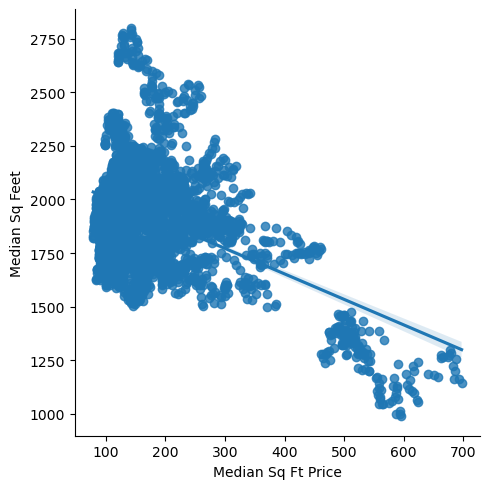

In [11]:
# Creating a scatterplot for the "Median Sq Ft Price" and "Median Sq Feet" columns in seaborn:

sns.lmplot(x = 'Median Sq Ft Price', y = 'Median Sq Feet', data = subset)

#### Comments:

While the trend line above is rather steep and denotes a negative dependency of moderate strength of -0.48 (in reality being very close to becoming a strong dependency), it is not linear. Plus there are quite a few data points that are far aways from the trend line - the ones between the 2250 and 2750 squre feet, and between 1000 and 1500 square feet, for example. At the same time there are no obvious ouliers. These observations let us know that corrleation coefficient alone is not enough and ask for an additional investigation.

_____________________________________

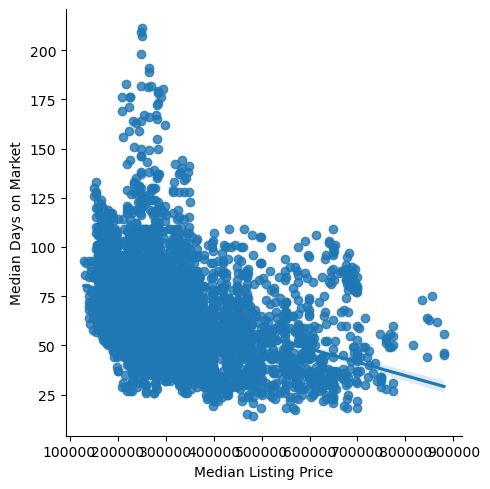

In [12]:
# Creating a scatterplot for the "Median Listing Price" vs "Median Days on Market" columns in seaborn:

sns.lmplot(x = 'Median Listing Price', y = 'Median Days on Market', data = subset)

#### Comments:

As we can see from the plot the relashionship is not linear and would benefit from a use of a polinomial trend line. There is also a considerable variance in data.

No obvious outliers affecting the trend have been noticed.

_____________________________________

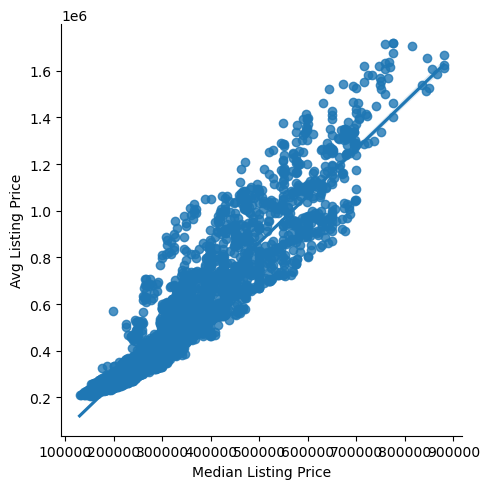

In [13]:
# Creating a scatterplot for the "Median Listing Price" and "Avg Listing Price" columns in seaborn:

sns.lmplot(x = 'Median Listing Price', y = 'Avg Listing Price', data = subset)

#### Comments:

So far this scatter plot is the most straightforward one: it has a very distinctive trend, which is marked by a linear trend line. There is also very little varinace in the data. The positive correlation coefficient of 0.94 means that the higher the most common price of a property, the higher the average price becomes.

No obvious outliers affecting the trend have been noticed.

____________________________

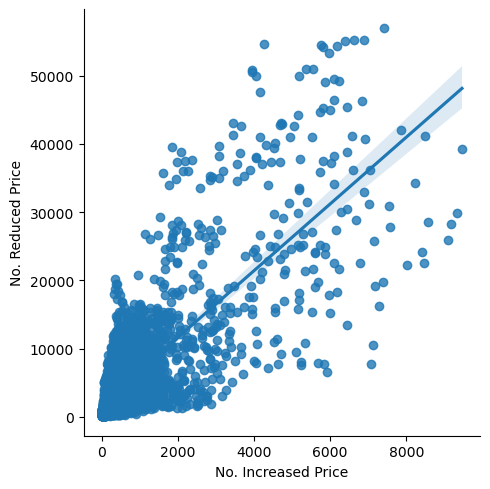

In [14]:
# Creating a scatterplot for the "No. Increased Price" and "No. Reduced Price" columns in seaborn:

sns.lmplot(x = 'No. Increased Price', y = 'No. Reduced Price', data = subset)

#### Comments:

I was curious what kind of correlation there is between the number of listings with reduced price and increased price, because these two variables are going to be important in aswering the question about demand for real estate. As it turned out while they have a very strong positive dependency of 0.78 (the more there are properties, which received a bump in price, the more there are those properties that had to be marked down), the trend is linear but a lot of data points are quite far away from from the trend line (data variance).

No obvious outliers affecting the trend have been noticed.

____________________________________

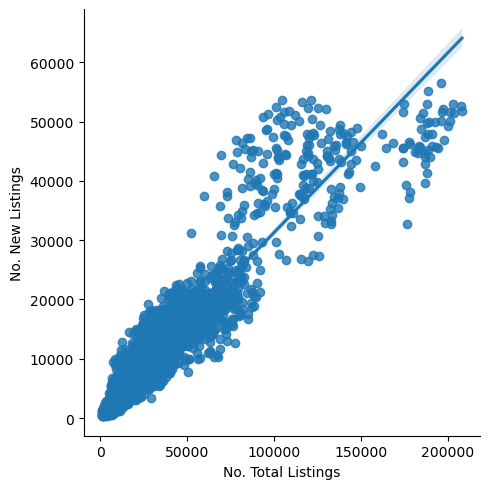

In [15]:
# Creating a scatterplot for the "No. Total Listings" and "No. New Listings" columns in seaborn:

sns.lmplot(x = 'No. Total Listings', y = 'No. New Listings', data = subset)

#### Comments:

Intersting! Without seeing the scatter plot, just knowing the positive dependency coenfficient of 0.94 and that it is natural to get higher numbers of new listings when the number of total listings grows, we could assume a tight linear trend line. But in reality the trend line is polinomial - after roughly 80,000 of total listings the trend goes upwards and at about 150,000 total listings it comes back as if continuing the beginning section of the trend line. The data points are devided into three sections, with the first section containing the datapoints clinging to the trendline the most tightly. The second section (between 80,000 and 150,000 total listings) being mostly above the trendline and the remaining senction being entirely below the trendline.

No obvious outliers affecting the trend have been noticed.

_____________________

## 5. Creating a pair plot of the data set

In [16]:
# Keeping only the variables I want to use in the pair plot:

subset2 = subset[['Median Listing Price', 'No. Active Listings', 'Median Days on Market', 'No. New Listings', 'No. Increased Price', 'No. Reduced Price', 'Median Sq Ft Price', 'Median Sq Feet', 'Avg Listing Price', 'No. Total Listings']]

In [17]:
subset2.head()

,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings
0,577000,12401,82,6242,262,3834,271,2129,1164082,18025
1,362400,5988,81,3278,66,1228,197,1772,446116,9504
2,347600,3117,75,1688,134,554,169,2133,387946,5099
3,282450,4498,84,2414,162,936,146,2016,396225,7479
4,209950,2791,86,1220,48,636,118,1726,289530,4355


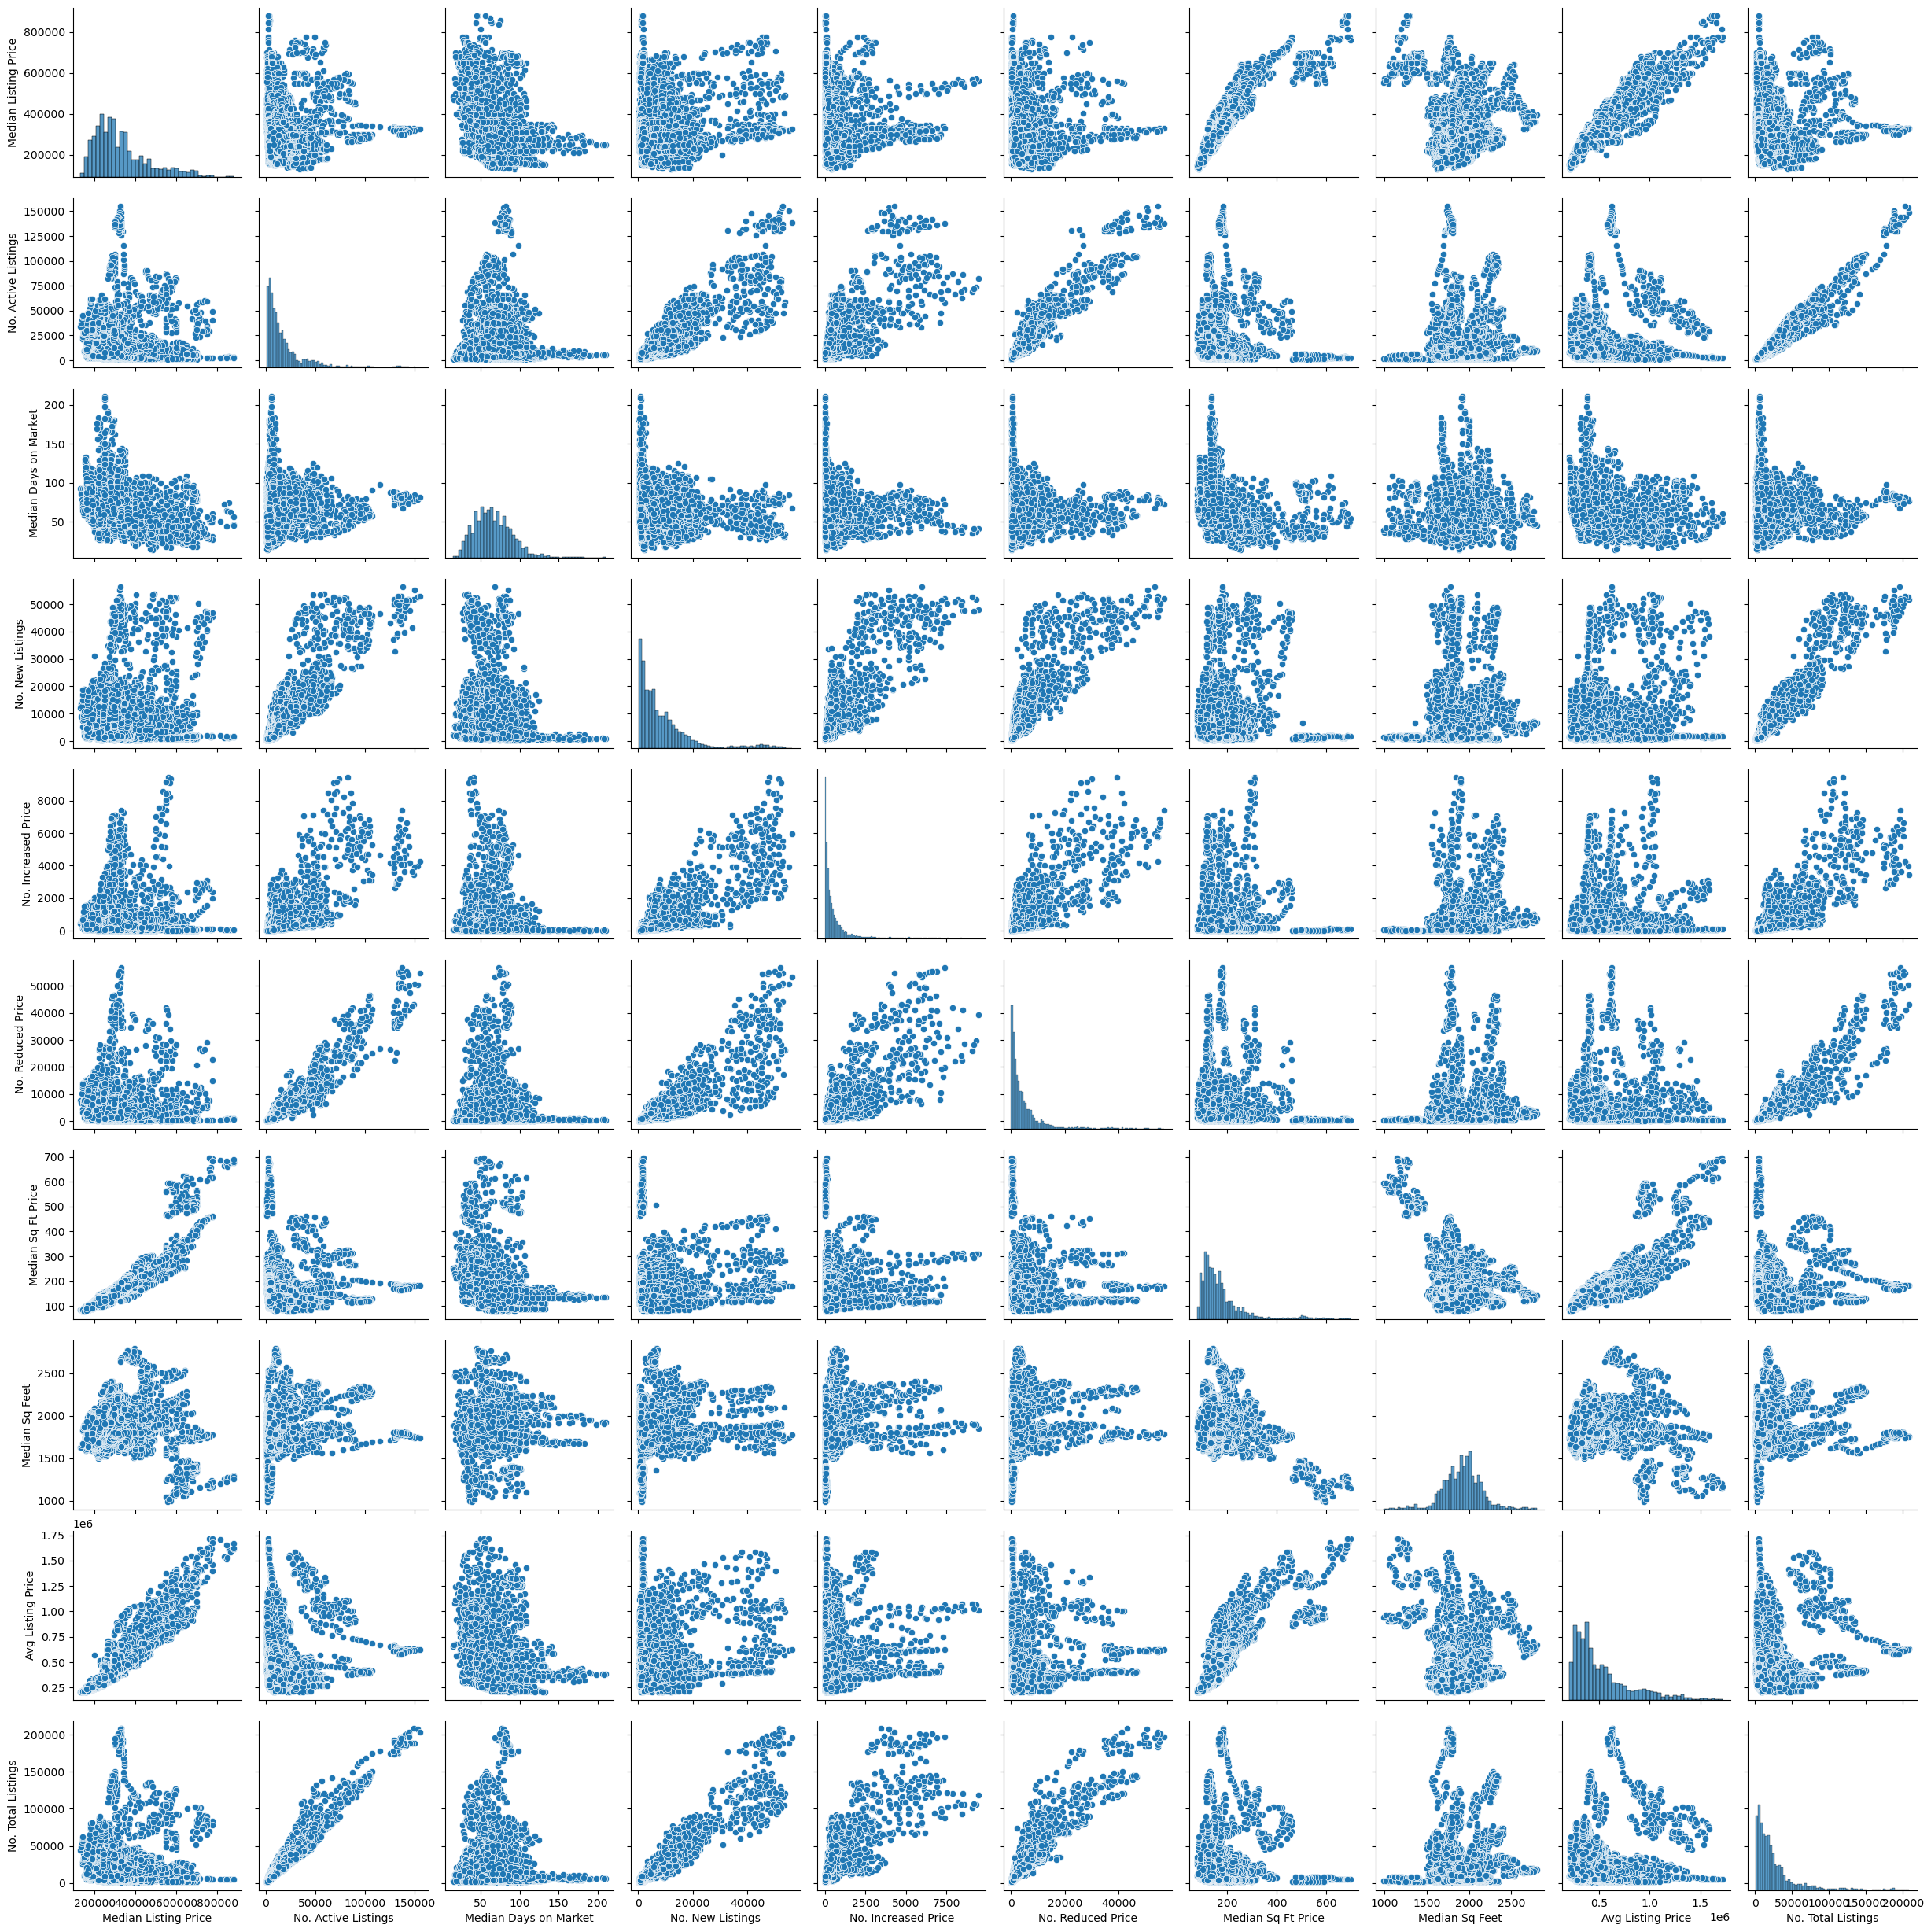

In [18]:
# Creating a pair plot of the smaller "subset2" ("No. Pending Listings" removed):

g = sns.pairplot(subset2)

#### Comments: Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

1. Median Listing Price distribution: unimodal, right-skewed. Prices of most of the properties fall into the lower third.
2. No. Active Listings distribution: unimodal, right-skewed. The majority of the active listings are not very numerous.
3. Median Days on Market distribution: unimodal, right-skewed. Only a small number of properties stay on the market for lengthy periods of time.
4. No. New Listings distribution: unimodal, right-skewed. Most of the new listings numbers are not very numerous.
5. No. Increased Price distribution: unimodal, right-skewed. Most of the properties with increased prices are not very numerous.
6. No. Reduced Price distribution: unimodal, right-skewed. Most of the properties with reduced prices are not very numerous.
7. Median Sq Ft Price distribution: unimodal, right-skewed. Most of common footage prices are on the cheaper side.
8. Median Sq Feet distribution: unimodal, symmetric. Most of the properties are of medium footage.
9. Avg Listing Price distribution: unimodal, right-skewed. Most average prices of the properties are gathered around the lower end.
10. No. Total Listings distribution: unimodal, right-skewed. Most of the total listings are least numerous.

I would investigate more on:

- Days on Market - to understand what might affect the time it takes a property to sell.
- Property footage and foot price - to know how they affect each other.
- Increased and reduced prices - to see any patterns if there are.

______________________

## 6. Creating a categorical plot of Median Days on Market vs. Median Sq Ft

<AxesSubplot:xlabel='Median Sq Feet', ylabel='Count'>

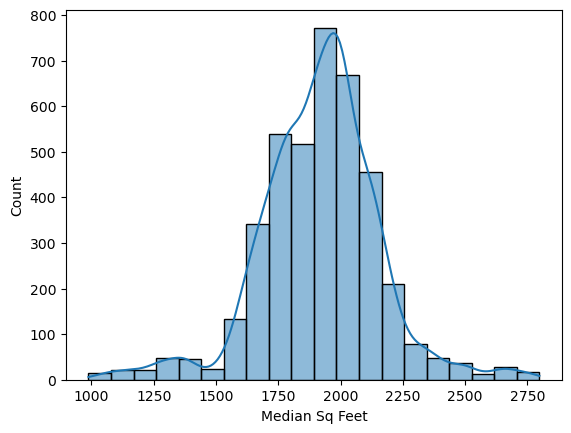

In [19]:
# Creating a histogram to visualize the distribution of the 'Median Sq Ft':

sns.histplot(subset2['Median Sq Feet'], bins = 20, kde = True)

In [20]:
# Creating categories of 'Median Sq Ft':

subset2.loc[subset2['Median Sq Feet'] < 1600, 'Footage category:'] = 'a) Small < 1600 sq.ft.'

subset2.loc[(subset2['Median Sq Feet'] >= 1600) & (subset2['Median Sq Feet'] < 2250), 'Footage category:'] = 'b) Medium'

subset2.loc[subset2['Median Sq Feet'] >= 2250, 'Footage category:'] = 'c) Large >= 2250 sq.ft.'

subset2['Footage category:'].value_counts(dropna = False)

/var/folders/_w/cktj2zv50h34n2spc6h0z5pc0000gp/T/ipykernel_25029/3580917758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset2.loc[subset2['Median Sq Feet'] < 1600, 'Footage category:'] = 'a) Small < 1600 sq.ft.'


b) Medium                  3567
a) Small < 1600 sq.ft.      237
c) Large >= 2250 sq.ft.     225
Name: Footage category:, dtype: int64

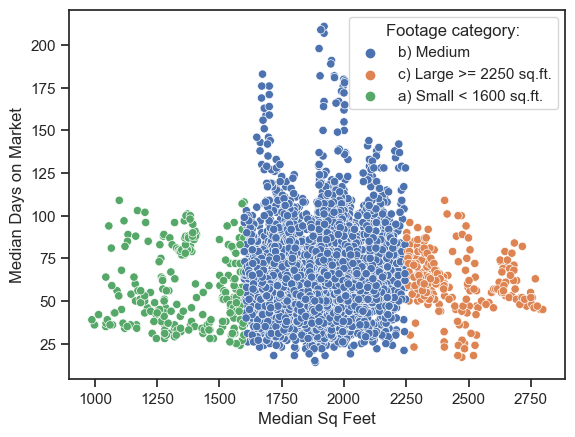

In [35]:
# Creating a categorical plot in seaborn using the footage categories:

g = sns.scatterplot(x = "Median Sq Feet", y = "Median Days on Market", hue = "Footage category:", data = subset2)

#### Comments:

There is an instersting finding from the above catplot - it turns out that smaller and larger properties stay less on the market comparing to their medium-sized neighbours that are between 1600 and 2250 squre feet.

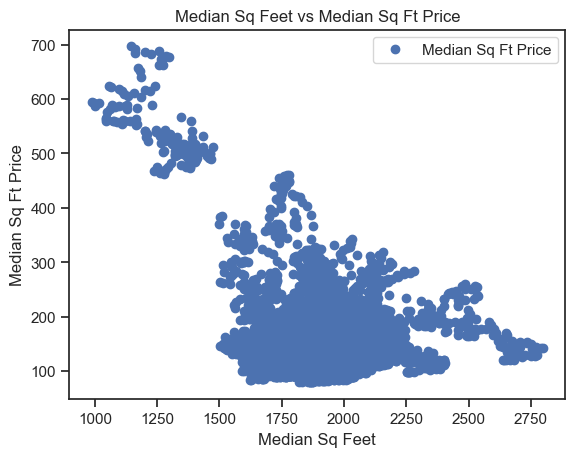

In [77]:
# Preparing for regression analysis:

subset.plot(x = 'Median Sq Feet', y = 'Median Sq Ft Price', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median Sq Feet vs Median Sq Ft Price')
plt.xlabel('Median Sq Feet')
plt.ylabel('Median Sq Ft Price')
plt.show()

In [78]:
# Reshaping the variable into NumPy arrays and putting them into separate objects:

X = subset['Median Sq Feet'].values.reshape(-1,1)

y = subset['Median Sq Ft Price'].values.reshape(-1,1)

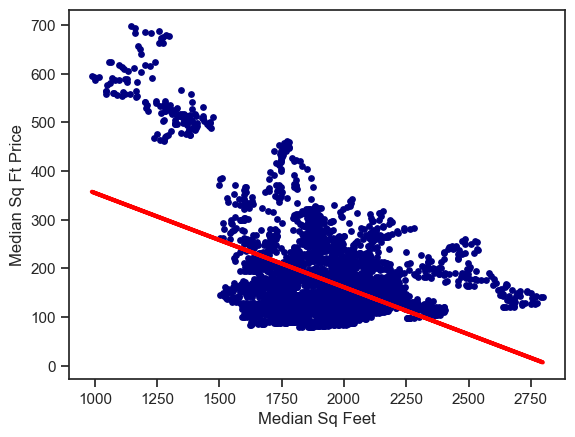

In [79]:
# Regression analysis on "Median Sq Feet" vs "Median Days on Market":

regression = LinearRegression()
regression.fit(X, y)
y_predicted = regression.predict(X)

plot = plt
plot.scatter(X, y, color = 'navy', s = 15)
plot.plot(X, y_predicted, color = 'red', linewidth = 3)
# plot.title('Median Sq Ft vs Median Days on Market')
plot.xlabel('Median Sq Feet')
plot.ylabel('Median Sq Ft Price')
plot.show()

In [67]:
# Creating objects that contain the model summary statistics:

    # Root mean squared error:
    
rmse = mean_squared_error(y, y_predicted)

    # r squared value:
    
r2 = r2_score(y, y_predicted)

In [68]:
# Evaluating the model performance through assessing the model summary statistics:

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-0.19347047]]
Mean squared error:  7159.9735355130815
R2 score:  0.23022297931281477


## 7. Revisiting the original questions. Adding new questions based on the early findings in the visual exploration

#### Answers:

1. The original questions have not been touched by the initial visual explorations above.

2. Additional questions may include the following:

    - What makes relatively inexpensive properties stay on the market for longer?
    - What makes more expensive properties have smaller footage?

## 8. Defining hypotheses

#### Hypotheses:

1. IF a property is smaller than 1600 sq ft THEN its price per sq ft is going to be higher.

2. IF a property hit the market after the onset of COVID-19 THEN its price per sq ft is going to be higher.

3. IF there are more properties with an increased price in a certain state THEN price per sq ft is going to be high as well.

4. IF there are more properties with an increased price in a certain state THEN they are going to be fewer days on market in that state.

5. IF there are more properties with a reduced price in a certain state THEN they are going to be more days on market in that state.

# 9. Exporting 'core_met' with renamed columns

In [22]:
# 9. Exporting 'core_met' with renamed columns as "Core_Metrics_Clean_Renamed.csv":

core_met.to_csv(os.path.join(path, 'Core_Metrics_Clean_Renamed.csv'))